Data taken from: https://www.kaggle.com/datasets/giripujar/hr-analytics

Data Uploaded by: GIRI PUJAR

Objective: <br>
Given a dataset of employees of a company, we need to develop a logistic regression to predict which employee would leave and which employee would not leave the company

### Importing Packages

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

### Importing the Dataset

In [66]:
data = pd.read_csv("E:\Programming\Datasets\HR_comma_sep.csv")
data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Preliminary Analysis

In [67]:
data.shape

(14999, 10)

Inference: <br>
There are 10 features in the dataset.

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Inference: <br>
* Each column has the correct datatype
* There are no null values in the dataset

In [69]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [70]:
data.groupby("left").mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_17248\2507836626.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("left").mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


### Inferences:
* The people who are retained have a higher satisfaction score
* The number of projects does not seem to have much impact on the people who left
* The people who are retained tend to have less working hours put in the comapny
* The people who had promotions in the last five years tend to be retained in the company more

## Exploratory Data Analysis

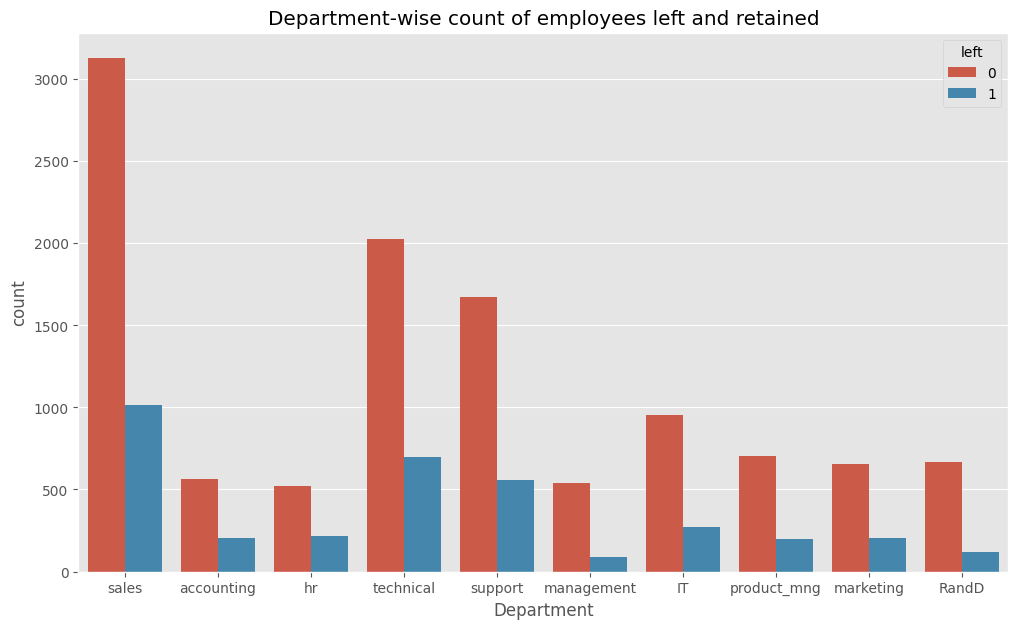

In [71]:
plt.figure(figsize = (12, 7))

plt.title("Department-wise count of employees left and retained")
sns.countplot(data = data, x = 'Department', hue = 'left')
plt.show()

### Inference:
* Sales has the most number of employees left but also has the most number of employees retained 
* Every department seems to have almost equal proportion of employees left to retained.
* Technical, support and management departments seem to have a lot more employees left than retained
* It appears as though there is not much relation between Department and employees left

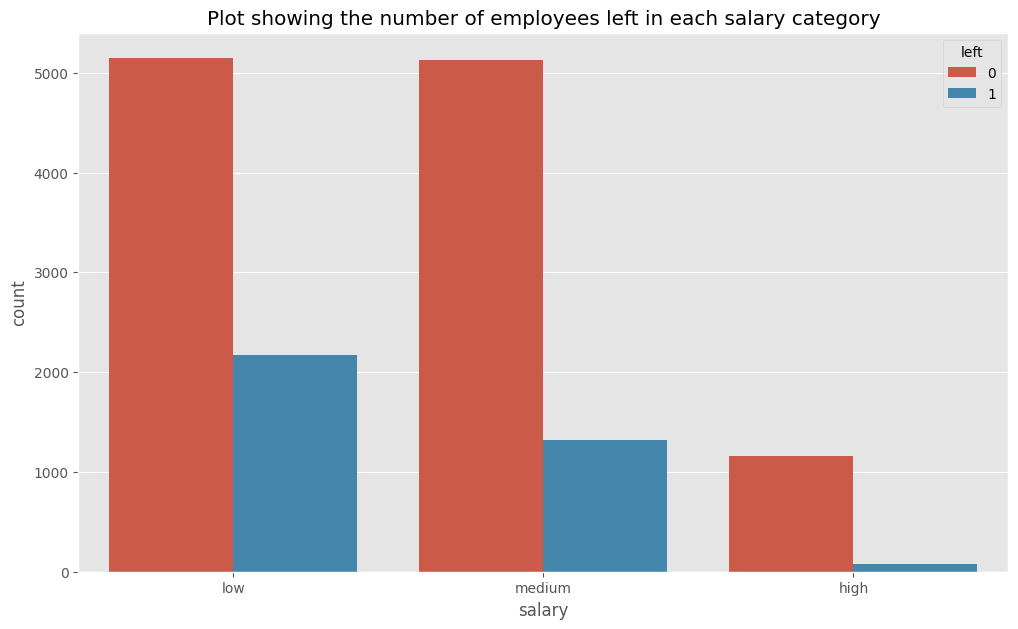

In [72]:
plt.figure(figsize = (12, 7))
sns.countplot(data = data, x = "salary", hue = "left")
plt.title("Plot showing the number of employees left in each salary category")
plt.show()

### Inference:
* Clearly, people with lower and medium salary bracket tend to leave the company more than the high salary category. 
* Cleary, this plot indicates that salary does have an effect on the retention of the employees

In [73]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

Decision Taken:
* After exploring the dataset, we choose the variables, "satisfaction_level", "average_monthly_hours", "promotion_last_five_years" and "salary"
* We exclude the feature "number_project" because it does not seem to have a strong impact on the people who left

In [131]:
data2 = data[["satisfaction_level", "average_montly_hours", "promotion_last_5years", "salary"]]
data2.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


Creating Dummy variables

In [132]:
data2 = pd.get_dummies(data2, columns = ["salary"])

In [133]:
data2.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


Setting dependent and independent features for the model 

In [134]:
X = data2.drop(columns = ["salary_medium"], axis = "columns")

In [135]:
y = data.left

Importing sklearn packages

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Splitting the training and testing data 

In [167]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

Creating our model 

In [168]:
model = LogisticRegression()

Fitting our training data 

In [169]:
model.fit(x_train, y_train)

LogisticRegression()

Evaluating our model 

In [170]:
score = model.score(x_test, y_test)
score

0.7833333333333333

Inference:
* Our model prepared has an accuracy of 78.3 percent